# Credit Card Fraud Detection

### Importing required Libraries & Dataset

In [1]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns , warnings
%matplotlib inline

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Abhi\Desktop\ML PROJECTS HOME\creditcard.csv')

df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Getting Deeper into Data

In [2]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

### Dealing with Missing Values ( i.e Null Values )

In [7]:
tdf = pd.DataFrame(df.isnull().sum(),columns = ['A'])
tdf[tdf.A > 0]    # No null values Found

Empty DataFrame
Columns: [A]
Index: []

## Exploratory Data Analysis ( EDA )

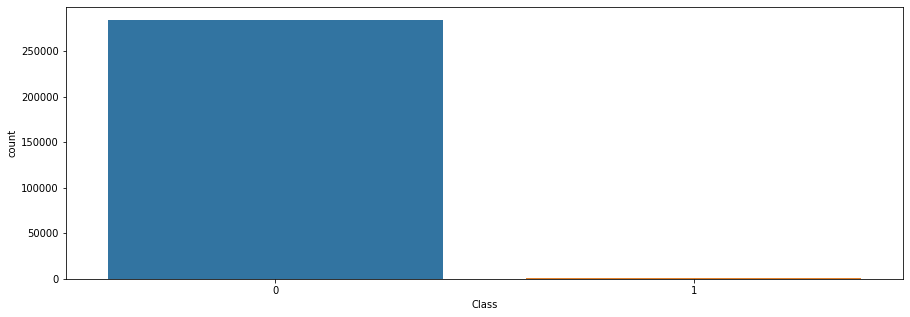

In [8]:
plt.figure(figsize=(15,5))       # Expanding size
sns.countplot(df['Class'])

# Taking Sample of Dataset to reduce Execuation time

In [9]:
adf = df[df['Class'] == 0].iloc[:10000,:]
bdf = df[df['Class'] == 1]
adf = adf.reset_index().drop('index',axis=1)
bdf = bdf.reset_index().drop('index',axis=1)

data = pd.concat([adf,bdf])

print(adf.shape,bdf.shape,data.shape)

(10000, 31) (492, 31) (10492, 31)


## Exploratory Data Analysis of sample Dataset ( EDA )

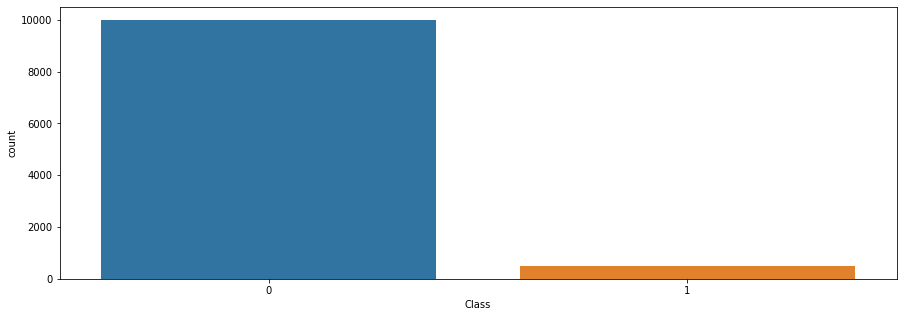

In [10]:
plt.figure(figsize=(15,5))       # Expanding size
sns.countplot(data['Class'])

## Feature Engineering & Feature Selection

### 30 Features Reduced to 20 Features

In [11]:
c= data.corr()    # Finding correlation

i = 0

# replacing diogonal corr() which is 1 to NaN for finding
#i.e manulating and get the informative features by removing high values of correlation.

while True:    
    try:
        c.iloc[i,i] = np.nan
        i += 1
    except:
        break

In [12]:
# filtering high corr. values which gives same pattern i.e which is noise

features = c[(c['Class'] > 0.1) | (c['Class'] < -0.1)].dropna(how = 'all')['Class']     #c[(c > 0.95) | (c == -1) ].dropna(how = 'all')   
features_col = list(features.index)
print(features.shape, len(features_col))     # Exactly what i want....

(20,) 20


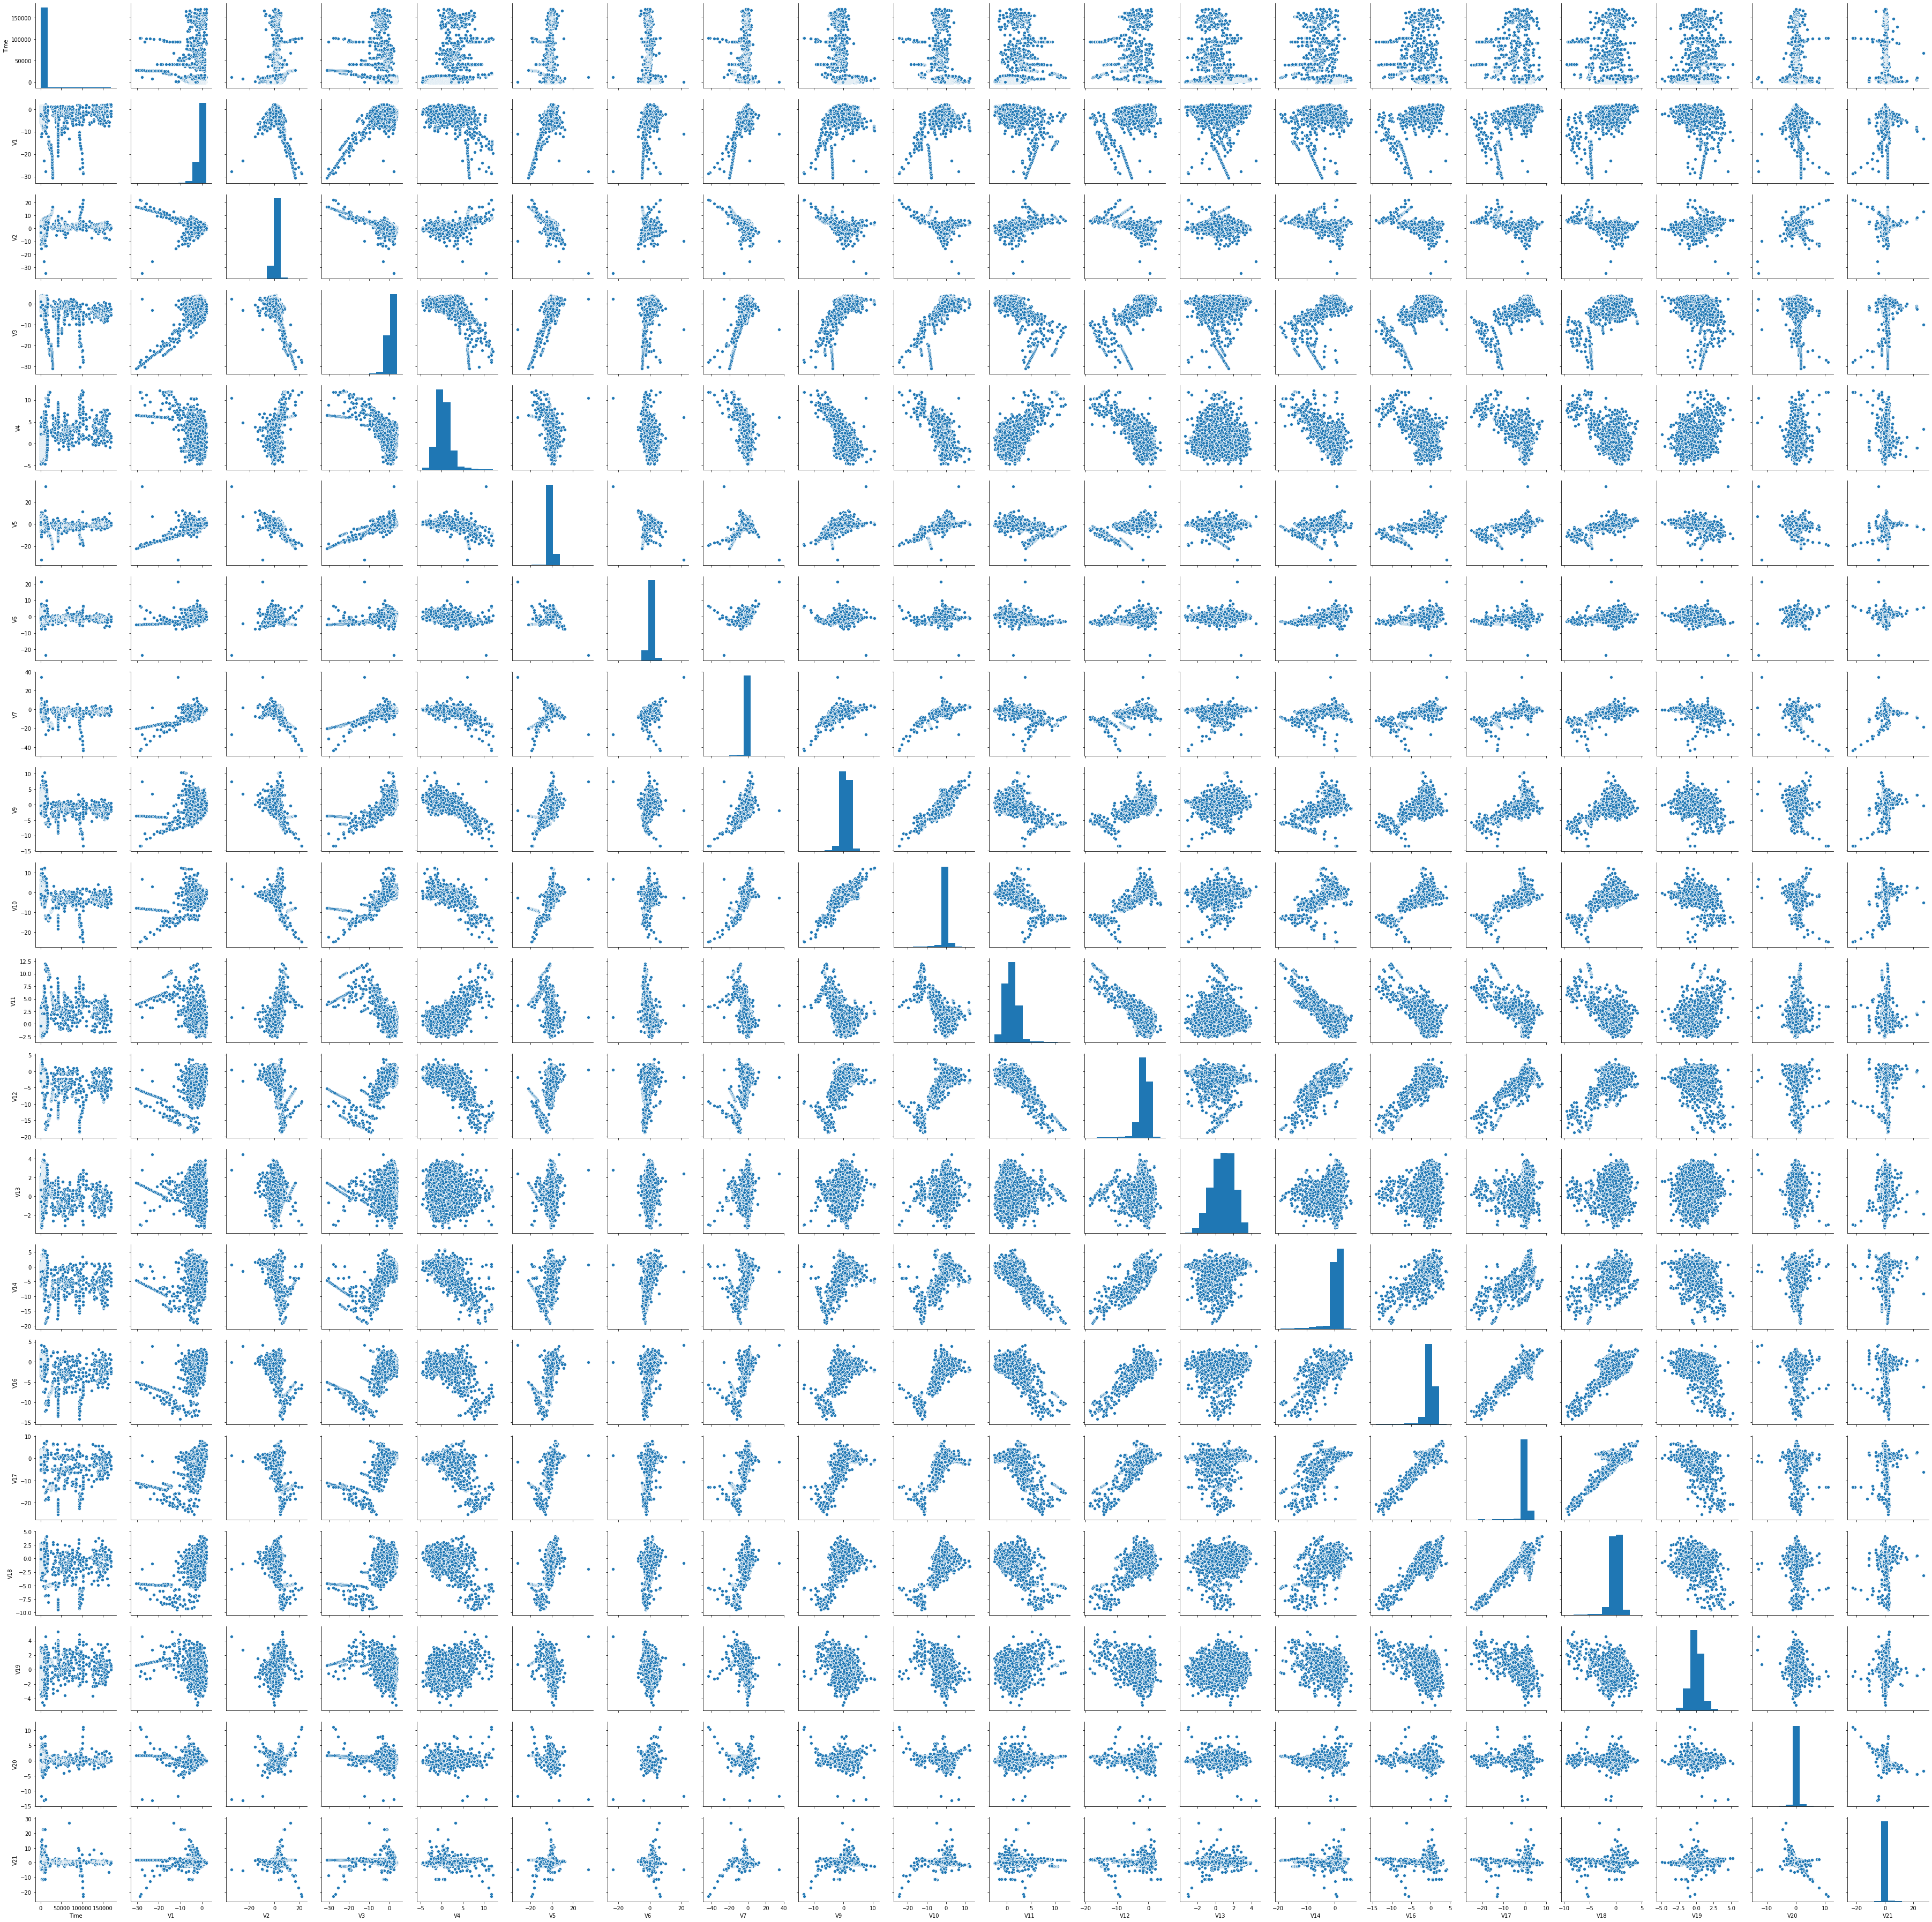

In [13]:
sns.pairplot(data[features_col])

## Comparing Models

In [14]:
# Preparing  pipeline for all the models
# Here RandomForest wins the race...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,classification_report


X = data[features_col]
y = data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)


def model(X,y):
    models = [LogisticRegression(penalty='l2'),DecisionTreeClassifier()
              ,RandomForestClassifier(),KNeighborsClassifier(),SVC(),IsolationForest()]
    
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(accuracy_score(y_test,y_pred),type(model).__name__,print(confusion_matrix(y_test,y_pred)) 
             ,print(classification_report(y_test,y_pred)),type(model).__name__)

model(X,y)

[[2498    2]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       0.98      1.00      0.99       123

    accuracy                           1.00      2623
   macro avg       0.99      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623

0.9992375142966069 LogisticRegression None None LogisticRegression
[[2496    4]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       0.97      1.00      0.98       123

    accuracy                           1.00      2623
   macro avg       0.98      1.00      0.99      2623
weighted avg       1.00      1.00      1.00      2623

0.9984750285932139 DecisionTreeClassifier None None DecisionTreeClassifier
[[2500    0]
 [   0  123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[   0    0    0]
 [ 145    0 2355]
 [ 114    0    9]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      2500
           1       0.00      0.07      0.01       123

    accuracy                           0.00      2623
   macro avg       0.00      0.02      0.00      2623
weighted avg       0.00      0.00      0.00      2623

0.003431185665268776 IsolationForest None None IsolationForest


### Here RandomForest Clearly Wins the race with 100 percent accuracy

# Building Final Model ( RandomForestClassifier )

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,classification_report


X = data[features_col]
y = data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)



model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred),type(model).__name__)

1.0 RandomForestClassifier


In [16]:
y_test.value_counts()

0    2500
1     123
Name: Class, dtype: int64

In [17]:
print(confusion_matrix(y_test,y_pred))

[[2500    0]
 [   0  123]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2500
           1       1.00      1.00      1.00       123

    accuracy                           1.00      2623
   macro avg       1.00      1.00      1.00      2623
weighted avg       1.00      1.00      1.00      2623



In [19]:
len(y_pred)

2623

### Most Informative features for Predicting "Credit Card Fraud Detection" ( 143 features where 419 features is noise which is removed )

In [20]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21'],
      dtype='object')

# ...END...